In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization

In [2]:
data=pd.read_csv('Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X=data.iloc[:,3:13]
y=data.iloc[:,13]

In [5]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
geography=pd.get_dummies(data['Geography'],drop_first=True)
gender=pd.get_dummies(data['Gender'],drop_first=True)

In [7]:
X=pd.concat([X,geography,gender],axis=1)

In [8]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.2)

In [10]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
7389,667,34,5,0.00,2,1,0,163830.64,0,1,0
9275,427,42,1,75681.52,1,1,1,57098.00,1,0,1
2995,535,29,2,112367.34,1,1,0,185630.76,0,0,0
5316,654,40,5,105683.63,1,1,0,173617.09,0,1,1
356,850,57,8,126776.30,2,1,1,132298.49,0,1,0


In [11]:

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
## Make ANN Layers 
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [13]:
classifier=Sequential()

In [17]:
X_train.shape[1:]

(11,)

In [19]:
classifier.add(Dense(units=10,kernel_initializer='he_uniform',activation='relu',input_dim=X_train.shape[1]))
classifier.add(BatchNormalization())
classifier.add(Dense(units=10,kernel_initializer='he_uniform',activation='relu'))
#classifier.add(Dense(units=30,kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [20]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                120       
_________________________________________________________________
batch_normalization (BatchNo (None, 10)                40        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 281
Trainable params: 261
Non-trainable params: 20
_________________________________________________________________


In [21]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 100,epochs = 100)

Epoch 1/100
54/54 [==============================] - 0s 7ms/step - loss: 0.5721 - accuracy: 0.7283 - val_loss: 0.5810 - val_accuracy: 0.7418
Epoch 2/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5158 - accuracy: 0.7837 - val_loss: 0.5205 - val_accuracy: 0.7758
Epoch 3/100
54/54 [==============================] - 0s 2ms/step - loss: 0.4843 - accuracy: 0.7960 - val_loss: 0.4915 - val_accuracy: 0.7857
Epoch 4/100
54/54 [==============================] - 0s 2ms/step - loss: 0.4656 - accuracy: 0.8015 - val_loss: 0.4751 - val_accuracy: 0.7944
Epoch 5/100
54/54 [==============================] - 0s 2ms/step - loss: 0.4534 - accuracy: 0.8061 - val_loss: 0.4657 - val_accuracy: 0.7952
Epoch 6/100
54/54 [==============================] - 0s 2ms/step - loss: 0.4425 - accuracy: 0.8099 - val_loss: 0.4580 - val_accuracy: 0.8012
Epoch 7/100
54/54 [==============================] - 0s 3ms/step - loss: 0.4336 - accuracy: 0.8153 - val_loss: 0.4511 - val_accuracy: 0.8039
Epoch 8/100
5

Epoch 59/100
54/54 [==============================] - 0s 3ms/step - loss: 0.3349 - accuracy: 0.8587 - val_loss: 0.3616 - val_accuracy: 0.8519
Epoch 60/100
54/54 [==============================] - 0s 2ms/step - loss: 0.3340 - accuracy: 0.8606 - val_loss: 0.3617 - val_accuracy: 0.8523
Epoch 61/100
54/54 [==============================] - 0s 2ms/step - loss: 0.3347 - accuracy: 0.8632 - val_loss: 0.3618 - val_accuracy: 0.8531
Epoch 62/100
54/54 [==============================] - 0s 2ms/step - loss: 0.3330 - accuracy: 0.8619 - val_loss: 0.3621 - val_accuracy: 0.8531
Epoch 63/100
54/54 [==============================] - 0s 2ms/step - loss: 0.3330 - accuracy: 0.8655 - val_loss: 0.3621 - val_accuracy: 0.8538
Epoch 64/100
54/54 [==============================] - 0s 2ms/step - loss: 0.3334 - accuracy: 0.8625 - val_loss: 0.3620 - val_accuracy: 0.8523
Epoch 65/100
54/54 [==============================] - 0s 2ms/step - loss: 0.3342 - accuracy: 0.8621 - val_loss: 0.3614 - val_accuracy: 0.8531
Epoch 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


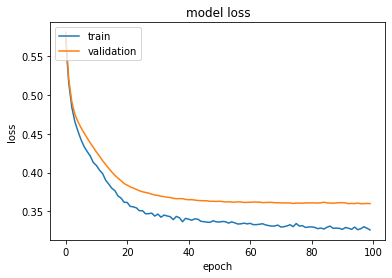

In [23]:
import matplotlib.pyplot as plt
print(model_history.history.keys())
# "Loss"
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()